In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


# Data fields

fecha_dato -	        The table is partitioned for this column

ncodpers -	        Customer code

ind_empleado -	    Employee index: A active, B ex employed, F filial, N not employee, P pasive

pais_residencia -	    Customer's Country residence

sexo -	            Customer's sex

age -	                Age

fecha_alta -	        The date in which the customer became as the first holder of a contract in the bank

ind_nuevo -	        New customer Index. 1 if the customer registered in the last 6 months.

antiguedad -	        Customer seniority (in months)

indrel -	            1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

ult_fec_cli_1t -	    Last date as primary customer (if he isn't at the end of the month)

indrel_1mes -	        Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)

tiprel_1mes -	        Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

indresi -	            Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
 
indext -	            Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

conyuemp -	        Spouse index. 1 if the customer is spouse of an employee

canal_entrada -	    channel used by the customer to join

indfall -	            Deceased index. N/S

tipodom -	            Addres type. 1, primary address

cod_prov -	        Province code (customer's address)

nomprov -	            Province name

ind_actividad_cliente -	Activity index (1, active customer; 0, inactive customer)

renta -	            Gross income of the household

segmento -	        segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

ind_ahor_fin_ult1 -	Saving Account

ind_aval_fin_ult1 -	Guarantees

ind_cco_fin_ult1 -	Current Accounts

ind_cder_fin_ult1 -	Derivada Account

ind_cno_fin_ult1 -	Payroll Account

ind_ctju_fin_ult1 -	Junior Account

ind_ctma_fin_ult1 -	Más particular Account

ind_ctop_fin_ult1 -	particular Account

ind_ctpp_fin_ult1 -	particular Plus Account

ind_deco_fin_ult1 -	Short-term deposits

ind_deme_fin_ult1 -	Medium-term deposits

ind_dela_fin_ult1 -	Long-term deposits

ind_ecue_fin_ult1 -	e-account

ind_fond_fin_ult1 -	Funds

ind_hip_fin_ult1 -	Mortgage

ind_plan_fin_ult1 -	Pensions

ind_pres_fin_ult1 -	Loans

ind_reca_fin_ult1 -	Taxes

ind_tjcr_fin_ult1 -	Credit Card

ind_valo_fin_ult1 -	Securities

ind_viv_fin_ult1 -	Home Account

ind_nomina_ult1 -	    Payroll

ind_nom_pens_ult1 -	Pensions

ind_recibo_ult1 -	    Direct Debit

Read data from CSV and limit the number of rows read in to avoid memory crashes.

In [2]:
limit_rows   = 1000000
df           = pd.read_csv("santander.csv",dtype={"sexo":str,
                                            "ind_nuevo":str,
                                            "ult_fec_cli_1t":str,
                                            "indext":str}, 
                                            nrows=limit_rows, low_memory=False)
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 12000
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

,ncodpers,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.908800e+04,18859.000000,18859.0,18859.0,18760.000000,18859.000000,1.570700e+04,19088.000000,19088.000000,19088.000000,...,19088.000000,19088.000000,19088.000000,19088.000000,19088.000000,19088.000000,19088.000000,18978.000000,18978.000000,19088.000000
mean,6.882459e+05,1.129911,1.0,1.0,26.745736,0.562914,1.377322e+05,0.000210,0.000105,0.749948,...,0.009482,0.014983,0.004086,0.074183,0.068787,0.043221,0.006182,0.074560,0.081463,0.167383
std,4.036841e+05,3.565827,0.0,0.0,12.487335,0.496039,2.150335e+05,0.014475,0.010236,0.433054,...,0.096917,0.121489,0.063795,0.262075,0.253098,0.203359,0.078384,0.262687,0.273552,0.373327
min,1.592700e+04,1.000000,1.0,1.0,1.000000,0.000000,5.437620e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.320960e+05,1.000000,1.0,1.0,18.000000,0.000000,7.196360e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.645705e+05,1.000000,1.0,1.0,28.000000,1.000000,1.067947e+05,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.067714e+06,1.000000,1.0,1.0,33.000000,1.000000,1.617906e+05,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.378904e+06,99.000000,1.0,1.0,52.000000,1.000000,1.180401e+07,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have a number of demographics for each individual as well as the products they currently own. To make a test set, I will separate the last month from this training data, and create a feature that indicates whether or not a product was newly purchased. First convert the dates. There's fecha_dato, the row-identifier date, and fecha_alta, the date that the customer joined.

In [3]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

Are there any columns missing values?

In [8]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

# Data Cleaning

Going down the list, start with age

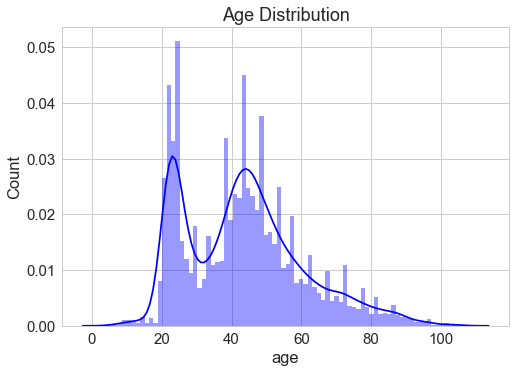

In [9]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=True,
                 color="blue")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In addition to NA, there are people with very small and very high ages. And the distribution is bimodal. There are a large number of university aged students, and then another peak appears around middle-age. Then I move outliers to the mean of the closest one.

In [10]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 100,"age"] = df.loc[(df.age >= 30) & (df.age <= 100),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

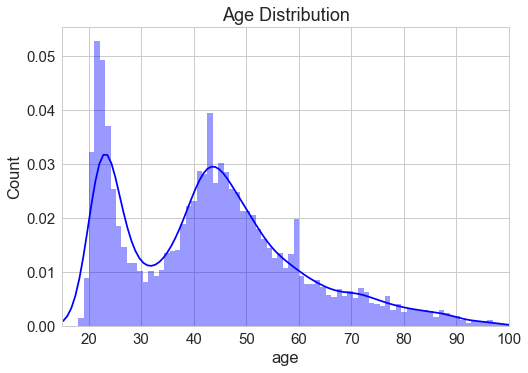

In [11]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=True,
                 color="blue")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

Looks better.

Next ind_nuevo, which indicates whether a customer is new or not. How many missing values are there?

In [12]:
df["ind_nuevo"].isnull().sum()

213

The value is set as 1 if the customer registered in the last 6 months. Let's see if we can fill in missing values by looking how many months of history these customers have.

In [13]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

2

Looks like these are all new customers, so replace accordingly.

In [14]:
df.loc[df["ind_nuevo"].isnull(),"ind_nuevo"] = 1

Now, antiguedad

In [15]:
df.antiguedad = pd.to_numeric(df.antiguedad,errors="coerce")
np.sum(df["antiguedad"].isnull())

213

That number again. Probably the same people that we just determined were new customers. Double check.

In [16]:
df.loc[df["antiguedad"].isnull(),"ind_nuevo"].describe()

count     213
unique      1
top         1
freq      213
Name: ind_nuevo, dtype: int64

Yup, same people. Let's give them minimum seniority.

In [17]:
df.loc[df.antiguedad.isnull(),"antiguedad"] = df.antiguedad.min()
df.loc[df.antiguedad <0, "antiguedad"]      = 0

Some entries don't have the date they joined the company. Just give them something in the middle of the pack

In [18]:
dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
df["fecha_alta"].describe()

count                   19283
unique                   3889
top       2007-04-10 00:00:00
freq                      215
first     1995-01-16 00:00:00
last      2015-02-10 00:00:00
Name: fecha_alta, dtype: object

Next is indrel, which indicates:

1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

This sounds like a promising feature. I'm not sure if primary status is something the customer chooses or the company assigns, but it seems intuitive that customers who are dropping down are likely to have different purchasing behaviors than others.

In [19]:
pd.Series([i for i in df.indrel]).value_counts()

1.0     19057
99.0       13
dtype: int64

Fill in missing with the more common status.

In [20]:
df.loc[df.indrel.isnull(),"indrel"] = 1

tipodom - Addres type.

cod_prov - Province code (customer's address)

tipodom doesn't seem to be useful, and the province code is not needed because the name of the province exists in another column (nomprov).

In [21]:
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)

Quick check back to see how I am doing on missing values

In [22]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

Getting closer.

In [23]:
np.sum(df["ind_actividad_cliente"].isnull())

213

By now you've probably noticed that this number keeps popping up. A handful of the entries are just bad, and should probably just be excluded from the model. But for now I will just clean/keep them.

In [24]:
df.loc[df.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
df["ind_actividad_cliente"].median()

In [25]:
df.nomprov.unique()

array(['MALAGA', 'ZARAGOZA', 'BARCELONA', 'TOLEDO', 'SALAMANCA', 'MADRID',
       'PALENCIA', 'CIUDAD REAL', 'HUESCA', 'CORDOBA', 'BURGOS', 'BIZKAIA',
       'CADIZ', 'CORUÑA, A', 'VALLADOLID', 'OURENSE', 'CACERES', 'SEVILLA',
       'MURCIA', 'CASTELLON', 'ALBACETE', 'ALMERIA', 'HUELVA', 'VALENCIA',
       'PONTEVEDRA', 'NAVARRA', 'LUGO', 'ALICANTE', 'SEGOVIA', 'GRANADA',
       'ZAMORA', 'LERIDA', 'CANTABRIA', 'RIOJA, LA', 'CUENCA', nan,
       'GIRONA', 'TARRAGONA', 'BALEARS, ILLES', 'BADAJOZ', 'AVILA',
       'ASTURIAS', 'LEON', 'SORIA', 'TERUEL', 'PALMAS, LAS', 'GIPUZKOA',
       'GUADALAJARA', 'JAEN', 'SANTA CRUZ DE TENERIFE', 'ALAVA', 'CEUTA',
       'MELILLA'], dtype=object)

There was an issue with the unicode character ñ in A Coruña. I'll manually fix it, but if anybody knows a better way to catch cases like this I would be very glad to hear it in the comments.

In [26]:
df.loc[df.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

There's some rows missing a city that I'll relabel

In [27]:
df.loc[df.nomprov.isnull(),"nomprov"] = "UNKNOWN"

Now for gross income, aka 'renta'

In [28]:
df.renta.isnull().sum()

3485

Here is a feature that is missing a lot of values. Rather than just filling them in with a median, it's probably more accurate to break it down region by region. To that end, let's take a look at the median income by region, and in the spirit of the competition let's color it like the Spanish flag.

In [29]:
incomes = df.loc[df.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in df.nomprov.unique()],ordered=False)
incomes.head()

/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,nomprov,renta
,,MedianIncome
0,BADAJOZ,62001.135
1,CIUDAD REAL,63653.490
2,AVILA,63962.820
3,ALICANTE,67357.860
4,CACERES,67545.180


([<matplotlib.axis.YTick at 0x112757160>,
 <a list of 5 Text yticklabel objects>)

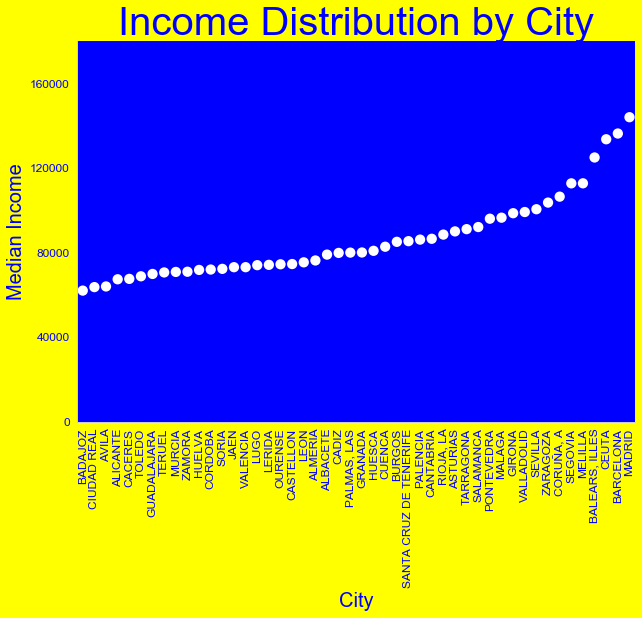

In [30]:
with sns.axes_style({
        "axes.facecolor":   "blue",
        "axes.grid"     :    False,
        "figure.facecolor": "yellow"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   color="white",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=12,labelcolor="blue")#
plt.ylabel("Median Income",size=20,color="blue")
plt.xlabel("City",size=20,color="blue")
plt.title("Income Distribution by City",size=40,color="blue")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

There's a lot of variation, so I think assigning missing incomes by providence is a good idea. First group the data by city, and reduce to get the median. This intermediate data frame is joined by the original city names to expand the aggregated median incomes, ordered so that there is a 1-to-1 mapping between the rows, and finally the missing values are replaced.

In [31]:
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

In [32]:
df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

The next columns with missing data I'll look at are features, which are just a boolean indicator as to whether or not that product was owned that month. Starting with ind_nomina_ult1 (Payroll).

In [33]:
df.ind_nomina_ult1.isnull().sum()

106

I could try to fill in missing values for products by looking at previous months, but since it's such a small number of values for now I'll take the cheap way out.

In [34]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

There's also a bunch of character columns that contain empty strings. 

First I'll get only the columns with missing values. Then print the unique values to determine what I should fill in with.

In [35]:
string_data = df.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' 'B' 'F' nan]

Unique values for pais_residencia:
['ES' nan 'BE' 'BR' 'CR' 'DE' 'US' 'NL' 'RO' 'PT' 'RU' 'AR' 'ML' 'SE' 'CL'
 'EC' 'BO' 'UY' 'FI' 'DZ' 'IT' 'CU' 'PE' 'VE' 'PY' 'CA' 'FR' 'IE' 'CO' 'SG'
 'CI' 'UA' 'GB' 'NG']

Unique values for sexo:
['V' 'H' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-10' '2015-07-01' '2015-07-06' '2015-07-17' '2015-07-08'
 '2015-07-13' '2015-07-09' '2015-07-30']

Unique values for tiprel_1mes:
['I' 'A' nan]

Unique values for indresi:
['S' nan 'N']

Unique values for indext:
['N' 'S' nan]

Unique values for conyuemp:
[nan 'N']

Unique values for canal_entrada:
['KHE' 'KAT' 'KFC' 'KCH' 'KBZ' 'KAW' 'KFA' 'KCI' 'KAG' 'KAM' '013' 'KCC'
 'KBH' 'KFG' 'KFD' 'KCJ' 'KHC' 'RED' 'KBQ' 'KAZ' 'KEL' 'KHD' 'KAR' 'KAF'
 'KEJ' 'KAS' '007' 'KAJ' 'KBO' 'KEY' 'KAQ' 'KHK' 'KFT' 'KAY' 'KBS' 'KBR'
 'KCR' 'KGX' 'KCB' 'KCG' 'KBG' 'KAP' 'KAH' 'KAA' 'KAI' 'KEN' 'KHF' 'KHL'
 'KFP' 'KEK' 'KHO' 'KEG' nan 'KAC' 'KCA' 'KCD' 'KFU' 'KES' 'KF

Okay, based on that and the definitions of each variable, I will fill the empty strings either with the most common value or create an unknown category based on what I think makes more sense.

In [36]:
df.loc[df.indfall.isnull(),"indfall"] = "N"
df.loc[df.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
df.tiprel_1mes = df.tiprel_1mes.astype("category")

map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

df.indrel_1mes.fillna("P",inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    df.loc[df[col].isnull(),col] = "UNKNOWN"


Let's check back to see if we missed anything

In [37]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

Convert the feature columns into integer values, and we're done cleaning.

In [38]:
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df[col] = df[col].astype(int)

Now for the main event. To study trends in customers adding or removing services, I will create a label for each product and month that indicates whether a customer added, dropped or maintained that service in that billing cycle. I will do this by assigning a numeric id to each unique time stamp, and then matching each entry with the one from the previous month. The difference in the indicator value for each product then gives the desired value.

In [39]:
unique_months = pd.DataFrame(pd.Series(df.fecha_dato.unique()).sort_values()).reset_index(drop=True)
unique_months["month_id"] = pd.Series(range(1,1+unique_months.size)) # start with month 1, not 0 to match what we already have
unique_months["month_next_id"] = 1 + unique_months["month_id"]
unique_months.rename(columns={0:"fecha_dato"},inplace=True)
df = pd.merge(df,unique_months,on="fecha_dato")

Now I'll build a function that will convert differences month to month into a meaningful label. Each month, a customer can either maintain their current status with a particular product, add it, or drop it.

In [40]:
def status_change(x):
    diffs = x.diff().fillna(0)# first occurrence will be considered Maintained, 
    #which is a little lazy. A better way would be to check if 
    #the earliest date was the same as the earliest we have in the dataset
    #and consider those separately. Entries with earliest dates later than that have 
    #joined and should be labeled as "Added"
    label = ["Added" if i==1 \
         else "Dropped" if i==-1 \
         else "Maintained" for i in diffs]
    return label

Now we can actually apply this function to each features using groupby followed by transform to broadcast the result back

In [41]:
df.loc[:, feature_cols] = df.loc[:, [i for i in feature_cols]+["ncodpers"]].groupby("ncodpers").transform(status_change)

I'm only interested in seeing what influences people adding or removing services, so I'll trim away any instances of "Maintained".

In [42]:
df = pd.melt(df, id_vars   = [col for col in df.columns if col not in feature_cols],
            value_vars= [col for col in feature_cols])
df = df.loc[df.value!="Maintained",:]
df.shape

(863, 28)

And we're done!

([<matplotlib.axis.YTick at 0x112586da0>,
 <a list of 5 Text yticklabel objects>)

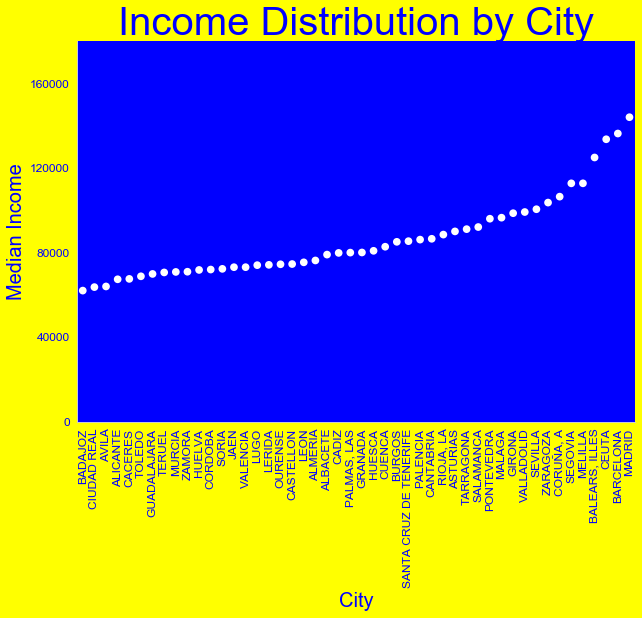

In [43]:
# For thumbnail
pylab.rcParams['figure.figsize'] = (6, 4)
with sns.axes_style({
        "axes.facecolor":   "blue",
        "axes.grid"     :    False,
        "figure.facecolor": "yellow"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=0.75,
                   color="white",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=12,labelcolor="blue")#
plt.ylabel("Median Income",size=20,color="blue")
plt.xlabel("City",size=20,color="blue")
plt.title("Income Distribution by City",size=40,color="blue")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

# Data Visualization

### Age distribution of the customers

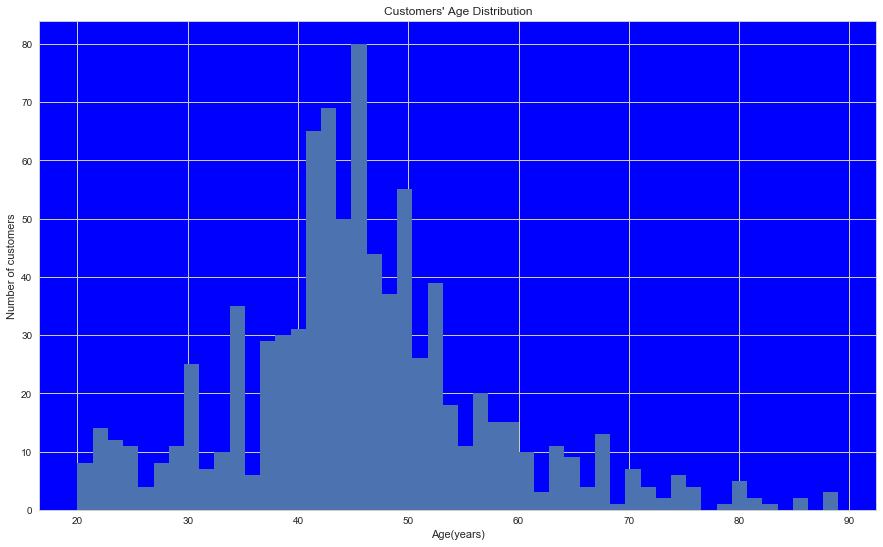

In [68]:
df['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

# Channel used by the customer to join

In [64]:
# Customers count by channel 
df['canal_entrada'].value_counts().head(15)

KAT        390
KFC        246
KFA         41
KHE         31
UNKNOWN     25
KAS         20
KAG         14
KAE          9
KFD          9
KAA          6
RED          6
KAH          6
KBH          5
KAD          5
KAY          5
Name: canal_entrada, dtype: int64

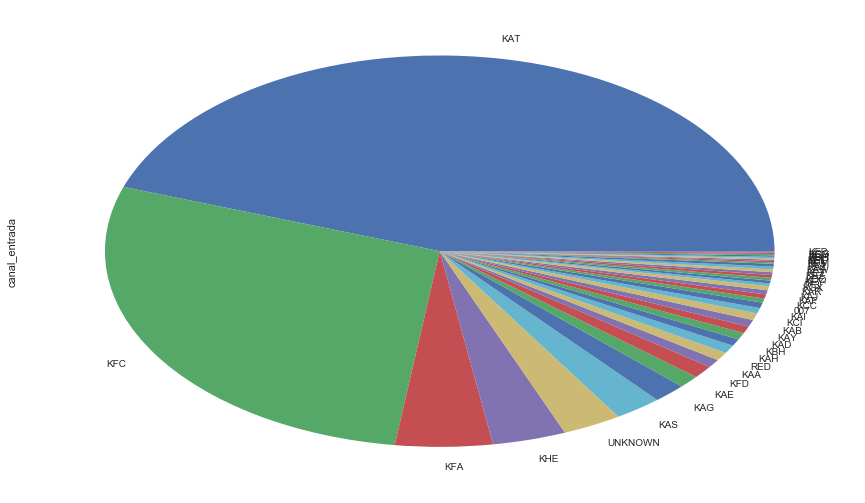

In [67]:
df["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

### Number of products by activity index and sex

In [71]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

KeyError: 'ind_ahor_fin_ult1'